In [4]:
# Importing all important Libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib as plt

import warnings

warnings.filterwarnings('ignore')

from IPython import display

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)

## Data Collection :

In [5]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain


## Data Preprocessing :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
 Income                1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [6]:
df.shape

(2240, 28)

In [7]:
df.axes

[RangeIndex(start=0, stop=2240, step=1),
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
        'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
        'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
        'AcceptedCmp2', 'Response', 'Complain', 'Country'],
       dtype='object')]

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=2240, step=1)

In [10]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
 Income                float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

In [11]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [12]:
df.fillna(88888,inplace =True)

In [13]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

## Data Visualization  :

In [ ]:
sns.histplot(df)

In [ ]:
sns.boxplot(df)

In [ ]:
sns.countplot(df)

In [ ]:
sns.pairplot(df)

In [ ]:
sns.distplot(df['Recency'])

## Comparing Numerical Features with Categorical Features :

In [ ]:
df.select_dtypes(include = 'object').head()

In [ ]:
df.select_dtypes(exclude = 'object').head()

## using groupby :

In [ ]:
df.groupby('Recency').first().head()

## Compairing two features :

In [ ]:
pd.crosstab(df['Recency'],df['Education']).head()

## Handling Outliers :

In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt

In [ ]:
sns.boxplot(df)

<Axes: >

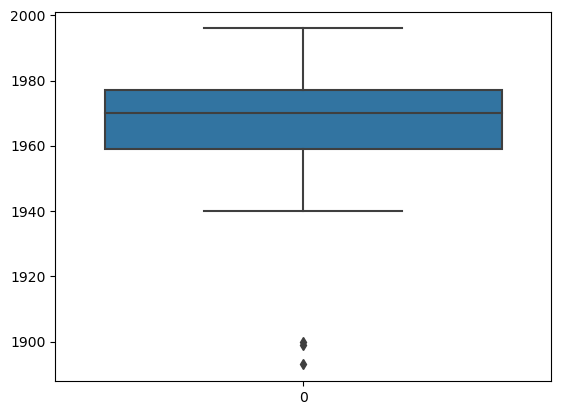

In [13]:
sns.boxplot(df['Year_Birth'])

In [15]:
q1 = df['Year_Birth'].quantile(0.25)
q2 = df['Year_Birth'].quantile(0.50)
q3 = df['Year_Birth'].quantile(0.75)

IQR = q3 - q1
med = df['Year_Birth'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


1959.0
1970.0
1977.0
1970.0
2004.0
1932.0


In [16]:
df['Year_Birth'].loc[df['Year_Birth'] < lower_tail]

513     1893
827     1899
2233    1900
Name: Year_Birth, dtype: int64

In [17]:
df['Year_Birth'].loc[df['Year_Birth'] < lower_tail] = lower_tail

In [18]:
df['Year_Birth'].loc[df['Year_Birth'] < lower_tail]

Series([], Name: Year_Birth, dtype: int64)

<Axes: >

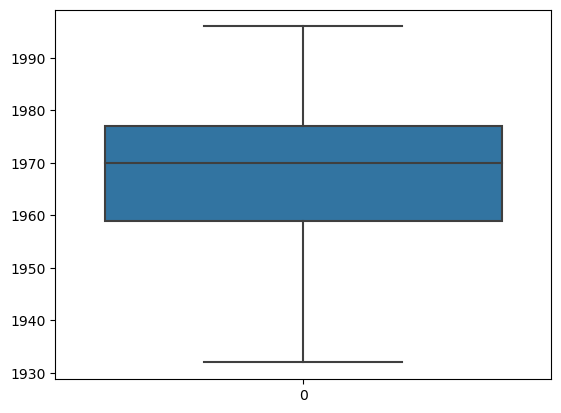

In [20]:
sns.boxplot(df['Year_Birth'])

<Axes: >

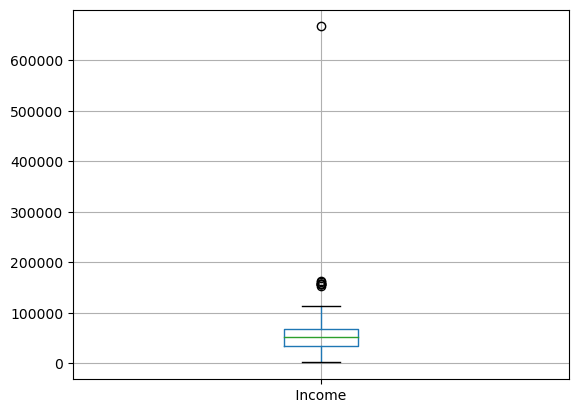

In [27]:
df[[' Income ']].boxplot()

In [37]:
q1 = df[' Income '].quantile(0.25)
q2 = df[' Income '].quantile(0.50)
q3 = df[' Income '].quantile(0.75)

IQR = q3 - q1
med = df[' Income '].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


35303.0
51381.5
68522.0
51381.5
118350.5
-14525.5


In [38]:
df[' Income '].loc[df[' Income ']>upper_tail]

325     157146.0
497     160803.0
527     666666.0
731     162397.0
853     157733.0
1826    153924.0
1925    156924.0
2204    157243.0
Name:  Income , dtype: float64

In [39]:
df[' Income '].loc[df[' Income ']>upper_tail] = upper_tail

In [40]:
df[' Income '].loc[df[' Income ']>upper_tail]

Series([], Name:  Income , dtype: float64)

<Axes: >

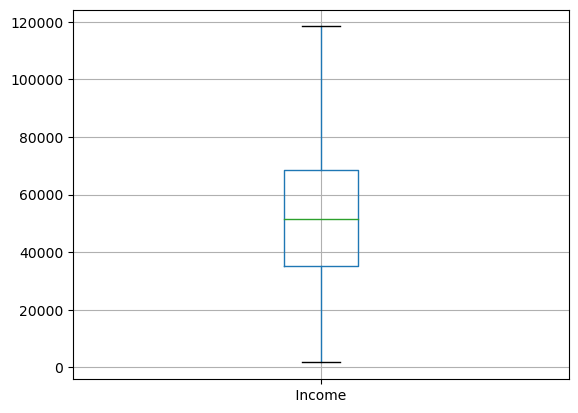

In [41]:
df[[' Income ']].boxplot()

<Axes: >

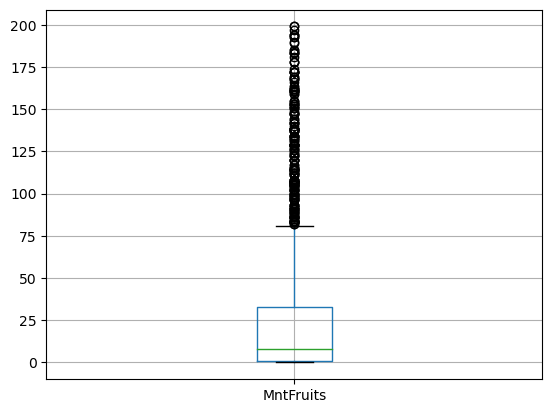

In [28]:
df[['MntFruits']].boxplot()

In [42]:
q1 = df['MntFruits'].quantile(0.25)
q2 = df['MntFruits'].quantile(0.50)
q3 = df['MntFruits'].quantile(0.75)

IQR = q3 - q1
med = df['MntFruits'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


1.0
8.0
33.0
8.0
81.0
-47.0


In [43]:
df['MntFruits'].loc[df['MntFruits'] > upper_tail]

0       104
5       130
12       82
29      174
45      169
74      107
75      105
77      105
91       96
93       86
101     193
108      83
142     148
160      83
164     103
169     142
170      97
173     117
174     134
190     153
191     148
195      83
202     142
238     106
248      88
249      88
256     153
277     133
285      99
313     129
314     129
316      93
319     107
326      86
335     185
342     162
399     168
405      98
411     129
419     172
423     140
426     194
428      91
434     183
436     134
437     151
441     197
444     185
465     178
469     189
470     102
476     155
483     115
487      98
491      98
528      90
533      83
534      83
535     114
574      99
575      93
583     199
584     199
587     154
588     183
593     123
607     108
612     133
618     137
619     137
639      91
640     151
668     129
671     120
672     120
681     108
682     108
683     107
685      84
696     142
710     129
741     112
742     183
744 

In [44]:
df['MntFruits'].loc[df['MntFruits'] > upper_tail] = upper_tail

In [45]:
df['MntFruits'].loc[df['MntFruits'] > upper_tail]

Series([], Name: MntFruits, dtype: int64)

<Axes: >

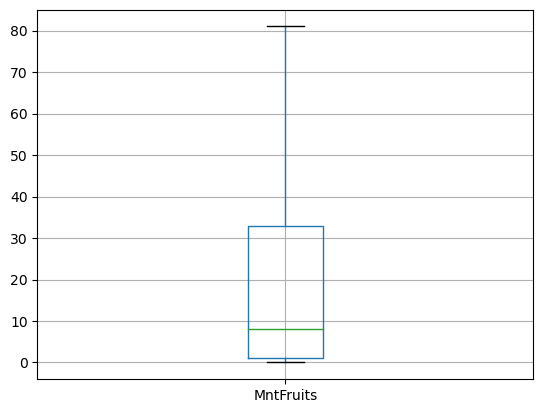

In [46]:
df[['MntFruits']].boxplot()

<Axes: >

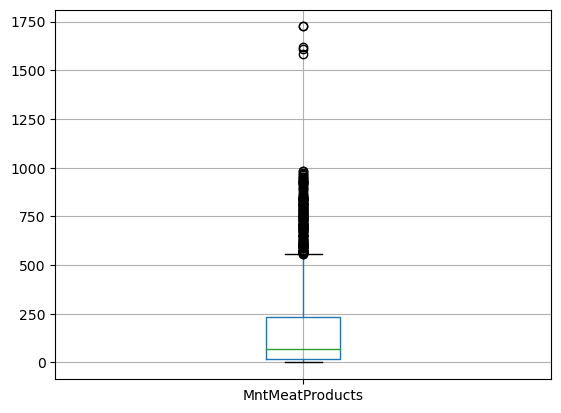

In [31]:
df[['MntMeatProducts']].boxplot()

In [47]:
q1 = df['MntMeatProducts'].quantile(0.25)
q2 = df['MntMeatProducts'].quantile(0.50)
q3 = df['MntMeatProducts'].quantile(0.75)

IQR = q3 - q1
med = df['MntMeatProducts'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


16.0
67.0
232.0
67.0
556.0
-308.0


In [48]:
df['MntMeatProducts'].loc[df['MntMeatProducts'] >upper_tail]

31       706
45       816
53       981
77       653
78       780
93       559
135      849
137      560
163      751
166      785
173      678
174      786
188      592
208      898
219      694
240      873
283      594
289      569
305      732
308      850
316      651
325     1725
330      697
335      687
340      622
353      731
361      804
376      731
385      842
423      599
425      570
434      565
436      670
444      575
465      689
470      673
487      733
491      827
492      590
497     1622
517      711
518      711
574      812
588      797
607      649
640      573
642      558
661      572
671      915
672      915
687      890
696      754
710      761
724      835
744      853
761      573
770      625
800      925
803      690
807      797
810      925
827      562
831      655
833      595
855      951
878      845
879      845
911      601
927      779
947      792
951      860
953      818
960      561
961     1725
964      631
973      929
994      974

In [49]:
df['MntMeatProducts'].loc[df['MntMeatProducts'] >upper_tail] = upper_tail

In [50]:
df['MntMeatProducts'].loc[df['MntMeatProducts'] >upper_tail]

Series([], Name: MntMeatProducts, dtype: int64)

<Axes: >

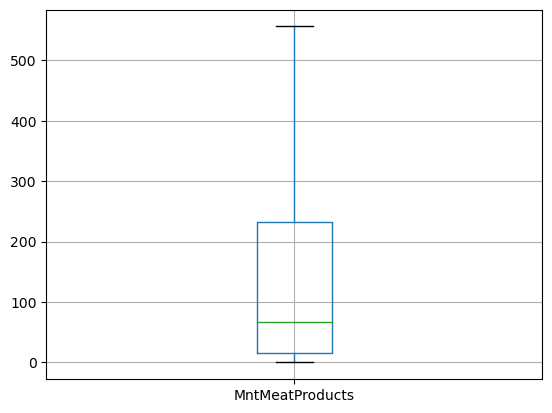

In [51]:
df[['MntMeatProducts']].boxplot()

<Axes: >

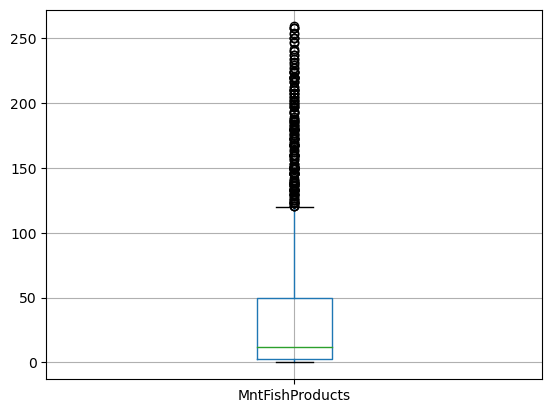

In [32]:
df[['MntFishProducts']].boxplot()

In [52]:
q1 = df['MntFishProducts'].quantile(0.25)
q2 = df['MntFishProducts'].quantile(0.50)
q3 = df['MntFishProducts'].quantile(0.75)

IQR = q3 - q1
med = df['MntFishProducts'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


3.0
12.0
50.0
12.0
120.5
-67.5


In [53]:
df['MntFishProducts'].loc[df['MntFishProducts']>upper_tail]

5       240
36      138
51      189
53      224
58      150
67      134
70      193
71      180
74      140
75      137
91      168
101     205
121     172
129     150
130     150
135     229
169     259
170     127
173     134
177     130
188     145
190     218
208     247
257     124
258     124
285     185
293     182
295     160
302     136
313     168
314     168
319     175
323     162
330     216
335     145
338     142
340     207
348     140
399     192
405     150
411     182
432     123
434     166
435     201
474     150
475     150
476     224
482     130
483     169
491     219
517     125
518     125
574     151
575     242
583     234
584     234
587     201
607     253
614     258
615     258
623     134
637     151
652     227
668     188
670     128
681     141
682     141
687     250
696     159
697     138
712     121
719     151
722     232
742     184
748     179
759     158
761     216
762     153
773     179
812     171
813     216
816     169
831     145
832 

In [54]:
df['MntFishProducts'].loc[df['MntFishProducts']>upper_tail] = upper_tail

In [55]:
df['MntFishProducts'].loc[df['MntFishProducts']>upper_tail]

Series([], Name: MntFishProducts, dtype: float64)

<Axes: >

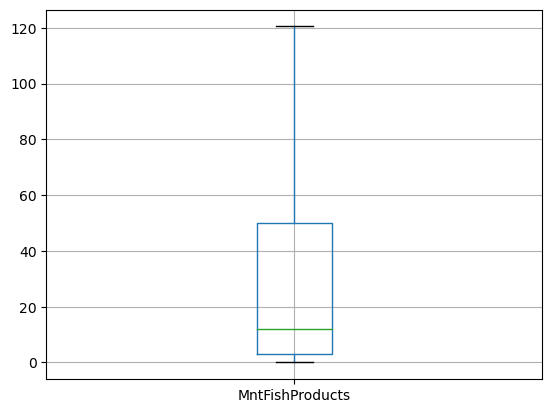

In [56]:
df[['MntFishProducts']].boxplot()

<Axes: >

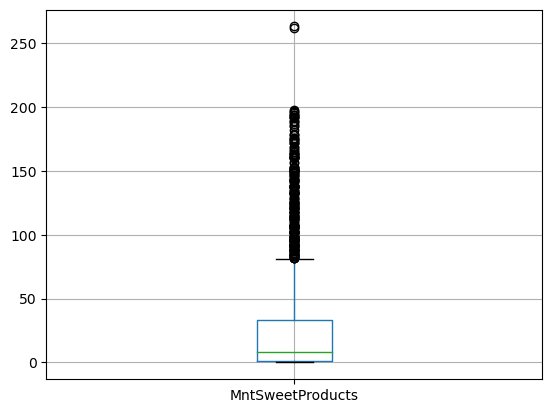

In [33]:
df[['MntSweetProducts']].boxplot()

In [57]:
q1 = df['MntSweetProducts'].quantile(0.25)
q2 = df['MntSweetProducts'].quantile(0.50)
q3 = df['MntSweetProducts'].quantile(0.75)

IQR = q3 - q1
med = df['MntSweetProducts'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


1.0
8.0
33.0
8.0
81.0
-47.0


In [58]:
df['MntSweetProducts'].loc[df['MntSweetProducts'] > upper_tail]

0       189
10       98
31      197
36       89
39      172
42      160
70       92
71      138
78      167
98      178
108      99
109     101
118     123
120      82
121      96
129     138
130     138
137     176
142     172
166     128
169     151
170     133
174     134
191     148
210     262
243      89
256      97
285     121
295     142
305     198
307      83
308      83
313     121
314     121
323     149
340     175
342     162
353     137
370      94
376     114
388      98
414     102
434     141
438     110
441     152
449     263
452     138
487     112
517     115
518     115
539      85
566     126
574      82
588     163
602      91
607     151
618     137
619     137
637     133
642      95
652     120
657     116
661     125
671     144
672     144
673     122
679      91
681      97
682      97
697     106
705      88
710     185
711     130
712     120
722     178
749     138
755     101
773     137
779     106
805     107
807     143
818     112
823     105
828 

In [59]:
df['MntSweetProducts'].loc[df['MntSweetProducts'] > upper_tail] = upper_tail

In [60]:
df['MntSweetProducts'].loc[df['MntSweetProducts'] > upper_tail]

Series([], Name: MntSweetProducts, dtype: int64)

<Axes: >

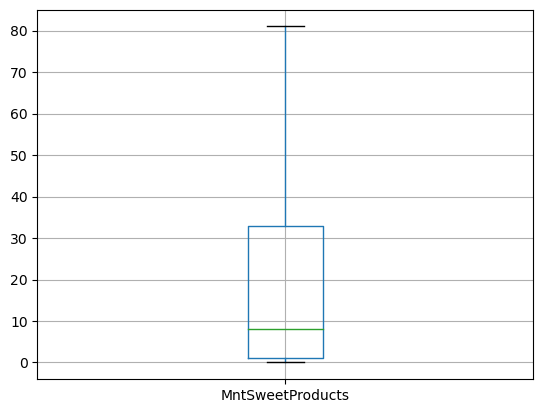

In [61]:
df[['MntSweetProducts']].boxplot()

<Axes: >

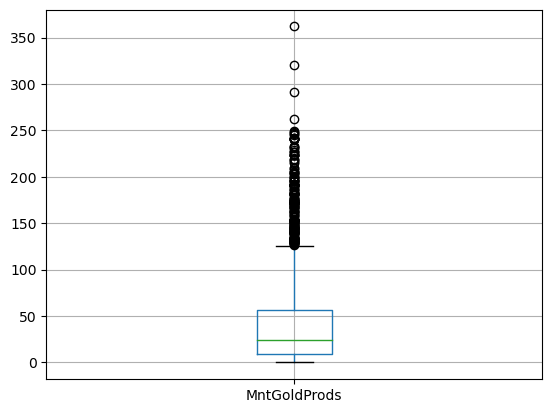

In [34]:
df[['MntGoldProds']].boxplot()

In [62]:
q1 = df['MntGoldProds'].quantile(0.25)
q2 = df['MntGoldProds'].quantile(0.50)
q3 = df['MntGoldProds'].quantile(0.75)

IQR = q3 - q1
med = df['MntGoldProds'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


9.0
24.0
56.0
24.0
126.5
-61.5


In [66]:
df['MntGoldProds'].loc[df['MntGoldProds']>upper_tail]

0       218
14      321
31      197
39      172
60      262
70      129
101     145
115     143
121     168
129     150
130     150
135     128
142     148
163     191
173     147
190     181
194     135
196     160
231     153
238     130
248     133
249     133
251     152
283     134
293     140
326     138
330     166
335     241
343     157
370     219
385     133
399     231
403     183
404     205
408     177
410     192
419     246
423     127
449     362
463     144
469     172
484     141
485     141
486     248
491     196
498     139
535     190
551     153
556     134
560     174
561     174
579     152
583     170
584     170
585     182
606     169
637     233
639     205
651     146
652     134
658     198
662     176
678     196
686     196
695     171
696     183
698     242
722     158
739     146
755     232
757     227
761     203
779     141
788     142
797     200
807     143
823     134
827     224
832     207
833     138
850     154
855     216
860     152
882 

In [67]:
df['MntGoldProds'].loc[df['MntGoldProds']>upper_tail] = upper_tail

In [68]:
df['MntGoldProds'].loc[df['MntGoldProds']>upper_tail]

Series([], Name: MntGoldProds, dtype: float64)

<Axes: >

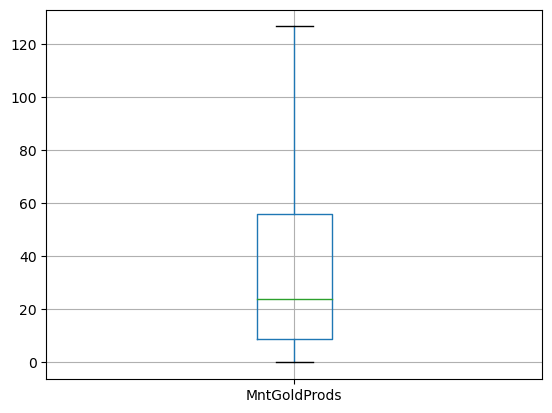

In [69]:
df[['MntGoldProds']].boxplot()

<Axes: >

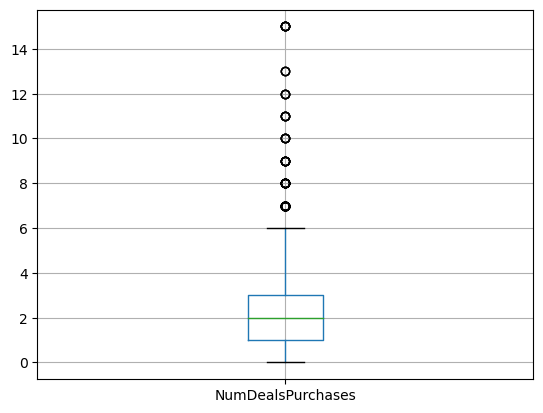

In [35]:
df[['NumDealsPurchases']].boxplot()

In [70]:
q1 = df['NumDealsPurchases'].quantile(0.25)
q2 = df['NumDealsPurchases'].quantile(0.50)
q3 = df['NumDealsPurchases'].quantile(0.75)

IQR = q3 - q1
med = df['NumDealsPurchases'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


1.0
2.0
3.0
2.0
6.0
-2.0


In [71]:
df['NumDealsPurchases'].loc[df['NumDealsPurchases'] > upper_tail]

26      12
27      12
64       7
105     11
106     11
127      9
134     12
226      8
251      7
263      9
269     10
273      7
334     11
400     10
471     12
493     10
497     15
512      8
555      7
583      7
584      7
604     11
661      7
663     15
708      8
713      9
714      9
850      7
860      7
902      9
942      7
944     10
961     15
995      7
1033     8
1047     7
1072     7
1077     9
1111     8
1158     8
1162     8
1164     7
1169     8
1172     7
1185     7
1193     8
1242     7
1262    11
1266     7
1267     7
1282     7
1314     7
1315     7
1332     7
1361     7
1362     7
1377     8
1391     7
1407     9
1416    15
1448     7
1457     9
1466    15
1524     7
1562     7
1563     7
1586     8
1588     7
1635     8
1640    13
1686    13
1718    15
1819     8
1840     7
1845     7
1847     7
1974     8
1975     7
1997    13
2034     7
2039     7
2080     7
2134     7
2135     7
2204    15
2218    10
Name: NumDealsPurchases, dtype: int64

In [72]:
df['NumDealsPurchases'].loc[df['NumDealsPurchases'] > upper_tail] = upper_tail

In [73]:
df['NumDealsPurchases'].loc[df['NumDealsPurchases'] > upper_tail]

Series([], Name: NumDealsPurchases, dtype: int64)

<Axes: >

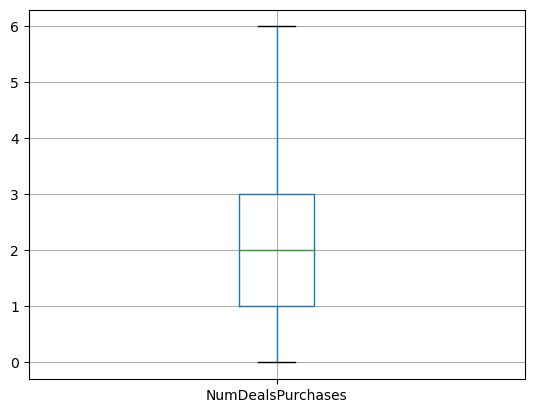

In [74]:
df[['NumDealsPurchases']].boxplot()

<Axes: >

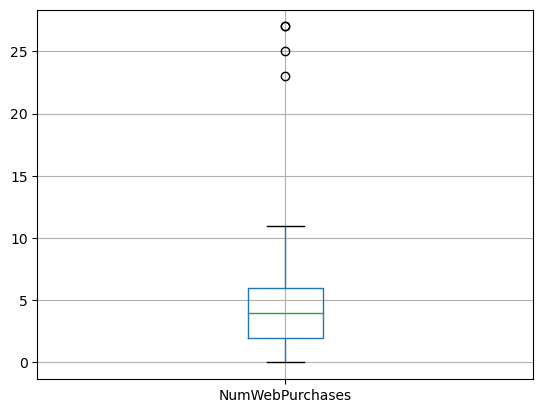

In [36]:
df[['NumWebPurchases']].boxplot()

In [75]:
q1 = df['NumWebPurchases'].quantile(0.25)
q2 = df['NumWebPurchases'].quantile(0.50)
q3 = df['NumWebPurchases'].quantile(0.75)

IQR = q3 - q1
med = df['NumWebPurchases'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


2.0
4.0
6.0
4.0
12.0
-4.0


In [76]:
df['NumWebPurchases'].loc[df['NumWebPurchases']>upper_tail]

14      25
210     27
449     27
2063    23
Name: NumWebPurchases, dtype: int64

In [77]:
df['NumWebPurchases'].loc[df['NumWebPurchases']>upper_tail] = upper_tail

In [78]:
df['NumWebPurchases'].loc[df['NumWebPurchases']>upper_tail]

Series([], Name: NumWebPurchases, dtype: int64)

<Axes: >

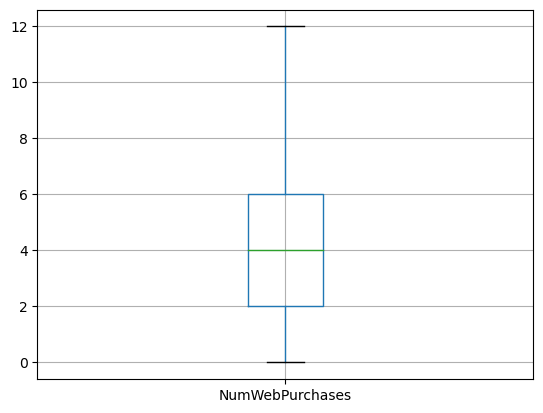

In [79]:
df[['NumWebPurchases']].boxplot()

In [ ]:
df15 = df.to_csv('')